# Boosting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import CleaningCars as cc

from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv('vehicles.csv')

In [3]:
df=cc.ultimateClean(df)

Remove outliers...
Remove outliers...
Cleaned outliers !
Imputed Missing Values
One hot encodings done!
Total Time:  6.88524227142334  minutes


In [4]:
from sklearn.preprocessing import StandardScaler

#Standardise features
cols_to_norm = ['year','odometer','lat','long']

df[cols_to_norm] = StandardScaler().fit_transform(df[cols_to_norm])

In [5]:
X=df.drop("price",axis=1)
y=df['price']

In [6]:
X.shape

(388335, 102)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# XGboost

In [17]:
import xgboost as xgb

model = xgb.XGBRegressor(learning_rate = 0.1, 
                           max_depth = 20, 
                           alpha = 10, 
                           n_estimators = 200)

model.fit(X_train,y_train)
preds_train= model.predict(X_train)
preds_test = model.predict(X_test)


print(f"MSE on train set: {mean_squared_error(y_train, preds_train)}")
print(f"RMSE on train set: {mean_squared_error(y_train, preds_train)**0.5}")
print()
print(f"MSE on test set:  {mean_squared_error(y_test, preds_test)}")
print(f"RMSE on test set:  {mean_squared_error(y_test, preds_test)**0.5}")

MSE on train set: 1681400.0488783927
RMSE on train set: 1296.6881077878338

MSE on test set:  18506914.684563376
RMSE on test set:  4301.966374178601


MSE on train set: 1681400.0488783927
RMSE on train set: 1296.6881077878338

MSE on test set:  18506914.684563376
RMSE on test set:  4301.966374178601

In [ ]:
from sklearn.model_selection import cross_val_score

model = xgb.XGBRegressor(learning_rate = 0.1, 
                           max_depth = 20, 
                           alpha = 10, 
                           n_estimators = 200)

cv_score=cross_val_score(model, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")


print(cv_score)
print("RMSE CV:", -np.mean(cv_score))

[-4539.40832934 -4530.79744298 -4562.29798048 -4540.67763391
 -4538.37326659]
RMSE CV: 4542.3109306609185

In [18]:
#Set the lowest predicted value to zero (negative predicted values make no sense for price)
import copy

preds_train2 = copy.copy(preds_train)
preds_test2 = copy.copy(preds_test)

preds_train2[preds_train2 < 0] = 0
preds_test2[preds_test2 < 0] = 0

print(f"MSE on train set: {mean_squared_error(y_train, preds_train2)}")
print(f"RMSE on train set: {mean_squared_error(y_train, preds_train2)**0.5}")
print()
print(f"MSE on test set:  {mean_squared_error(y_test, preds_test2)}")
print(f"RMSE on test set:  {mean_squared_error(y_test, preds_test2)**0.5}")

MSE on train set: 1680198.6649892374
RMSE on train set: 1296.224774099476

MSE on test set:  18494230.29625137
RMSE on test set:  4300.491866781214


MSE on train set: 1680198.6649892374
RMSE on train set: 1296.224774099476

MSE on test set:  18494230.29625137
RMSE on test set:  4300.491866781214

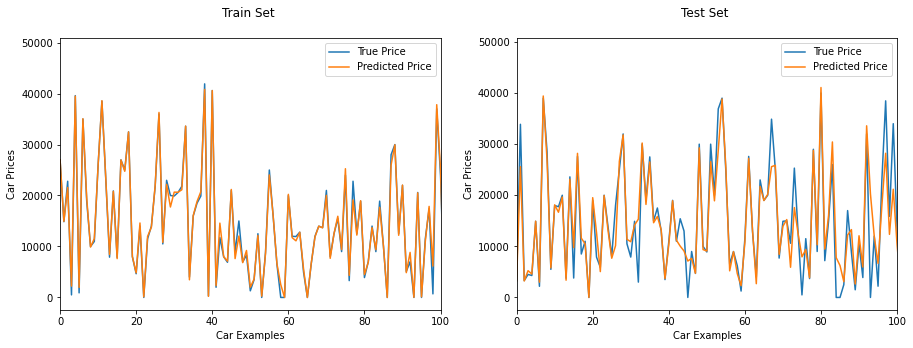

In [19]:
fig,ax=plt.subplots(1,2,figsize=(15,5))

ax[0].plot(np.arange(len(y_train)), y_train, label='True Price')
ax[0].plot(np.arange(len(preds_train2)), preds_train2, label='Predicted Price')
ax[0].set_title("Train Set \n")
ax[0].set_xlabel("Car Examples")
ax[0].set_ylabel("Car Prices")
ax[0].set_xlim(0,100)
#ax[0].set_ylim(0,35)
ax[0].legend()

ax[1].plot(np.arange(len(y_test)), y_test, label='True Price')
ax[1].plot(np.arange(len(preds_test2)), preds_test2, label='Predicted Price')
ax[1].set_title("Test Set \n")
ax[1].set_xlabel("Car Examples")
ax[1].set_ylabel("Car Prices")
ax[1].set_xlim(0,100)
#ax[1].set_ylim(0,35)
ax[1].legend()

plt.show()

# LGBM

In [8]:
import lightgbm as lgb

model=lgb.LGBMRegressor(learning_rate=0.1,
                        boosting_type="gbdt",  
                        objective="regression",
                        metric="mse",
                        num_leaves=2000,
                        max_depth=40,
                        n_estimators=1000)

model.fit(X_train, y_train)

preds_train=model.predict(X_train)
preds_test=model.predict(X_test)


print(f"MSE on train set: {mean_squared_error(y_train, preds_train)}")
print(f"RMSE on train set: {mean_squared_error(y_train, preds_train)**0.5}")
print()
print(f"MSE on test set:  {mean_squared_error(y_test, preds_test)}")
print(f"RMSE on test set:  {mean_squared_error(y_test, preds_test)**0.5}")

MSE on train set: 1450707.5653418957
RMSE on train set: 1204.4532225627925

MSE on test set:  17791916.687488742
RMSE on test set:  4218.046548757937


MSE on train set: 1450707.5653418957
RMSE on train set: 1204.4532225627925

MSE on test set:  17791916.687488742
RMSE on test set:  4218.046548757937

In [13]:
from sklearn.model_selection import cross_val_score

model=lgb.LGBMRegressor(learning_rate=0.1,
                        boosting_type="gbdt",  
                        objective="regression",
                        metric="mse",
                        num_leaves=2000,
                        max_depth=40,
                        n_estimators=1000)

cv_score=cross_val_score(model, X, y, cv=5, scoring="neg_root_mean_squared_error")

print(cv_score)
print("RMSE CV:", -np.mean(cv_score))

[-6575.27742835 -5899.6527421  -5654.14243284 -6246.97119738
 -7012.66697976]
RMSE CV: 6277.742156086253


[-6575.27742835 -5899.6527421  -5654.14243284 -6246.97119738
 -7012.66697976]
RMSE CV: 6277.742156086253

In [9]:
#Set the lowest predicted value to zero (negative predicted values make no sense for price)
import copy

preds_train2 = copy.copy(preds_train)
preds_test2 = copy.copy(preds_test)

preds_train2[preds_train2 < 0] = 0
preds_test2[preds_test2 < 0] = 0

print(f"MSE on train set: {mean_squared_error(y_train, preds_train2)}")
print(f"RMSE on train set: {mean_squared_error(y_train, preds_train2)**0.5}")
print()
print(f"MSE on test set:  {mean_squared_error(y_test, preds_test2)}")
print(f"RMSE on test set:  {mean_squared_error(y_test, preds_test2)**0.5}")

MSE on train set: 1444229.6646083477
RMSE on train set: 1201.761068019907

MSE on test set:  17726394.436102573
RMSE on test set:  4210.272489531119


MSE on train set: 1444229.6646083477
RMSE on train set: 1201.761068019907

MSE on test set:  17726394.436102573
RMSE on test set:  4210.272489531119

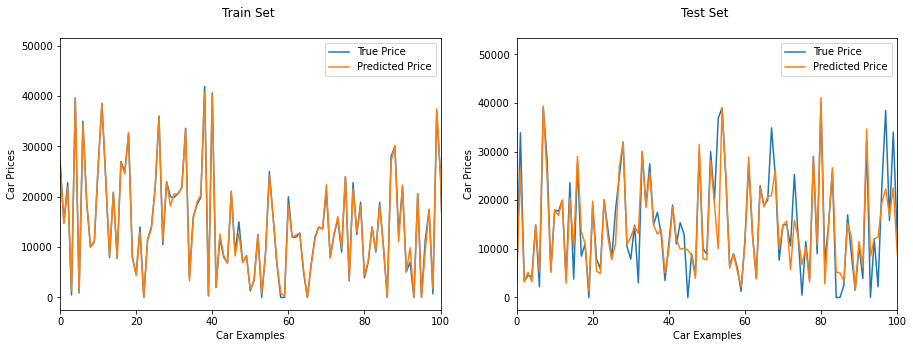

In [10]:
fig,ax=plt.subplots(1,2,figsize=(15,5))

ax[0].plot(np.arange(len(y_train)), y_train, label='True Price')
ax[0].plot(np.arange(len(preds_train2)), preds_train2, label='Predicted Price')
ax[0].set_title("Train Set \n")
ax[0].set_xlabel("Car Examples")
ax[0].set_ylabel("Car Prices")
ax[0].set_xlim(0,100)
#ax[0].set_ylim(0,35)
ax[0].legend()

ax[1].plot(np.arange(len(y_test)), y_test, label='True Price')
ax[1].plot(np.arange(len(preds_test2)), preds_test2, label='Predicted Price')
ax[1].set_title("Test Set \n")
ax[1].set_xlabel("Car Examples")
ax[1].set_ylabel("Car Prices")
ax[1].set_xlim(0,100)
#ax[1].set_ylim(0,35)
ax[1].legend()

plt.show()